In [12]:
import os
import pandas as pd

In [2]:
fn = os.path.join('/Users/chiuchiu/Downloads/ISIC2018/label_test.csv')
csvfile = pd.read_csv(fn)
raw_data = csvfile.values

In [3]:
raw_data

array([['ISIC_0034524', 0.0, 1.0, ..., 0.0, 0.0, 0.0],
       ['ISIC_0034525', 0.0, 1.0, ..., 0.0, 0.0, 0.0],
       ['ISIC_0034526', 0.0, 0.0, ..., 1.0, 0.0, 0.0],
       ...,
       ['ISIC_0036062', 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ['ISIC_0036063', 0.0, 0.0, ..., 1.0, 0.0, 0.0],
       ['ISIC_0036064', 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [5]:
from torchvision import transforms
from dataset.isic_dataset import ISICDataset
from torch.utils.data.dataloader import DataLoader

### Model Exploration

In [1]:
import torch

In [2]:
checkpoint_path = '/Users/leo/Desktop/PH_ImageClassification/pre_trained_weights/swin_v2_b-781e5279.pth'
checkpoint = torch.load(checkpoint_path,map_location = torch.device('cpu'))

In [3]:
len(checkpoint.keys())

449

In [4]:
from models.swin_transformer_v2 import swin_v2_b
net = swin_v2_b(weights="IMAGENET1K_V1", num_classes=1000,).bfloat16()

delete features =================================


In [6]:
net

SwinTransformer(
  (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (permute): Permute()
  (avgpool): AdaptiveAvgPool2d(output_size=1)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (head): Linear(in_features=1024, out_features=1000, bias=True)
  (patch_embedding): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
    (1): Permute()
    (2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (stage_1): Sequential(
    (0): SwinTransformerBlockV2(
      (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (attn): ShiftedWindowAttentionV2(
        (qkv): Linear(in_features=128, out_features=384, bias=True)
        (proj): Linear(in_features=128, out_features=128, bias=True)
        (cpb_mlp): Sequential(
          (0): Linear(in_features=2, out_features=512, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=512, out_features=4, bias=False)
        )
      )
      (stochastic_depth): StochasticDept

In [ ]:
train_transform = transforms.Compose([
    transforms.ToTensor(),])

data = ISICDataset(transform=train_transform)
dataloader = DataLoader(data, batch_size=4)
for image,target in dataloader:
    image = image.bfloat16()
    pred,_ = net(image)
    print(pred.shape)


In [1]:
from torchvision.io import read_image
img = read_image('/Users/leo/Desktop/PH_ImageClassification/data/raw_data/ISIC2018/train/ISIC_0024306.jpg')


In [4]:
import torch

In [5]:
#BH1(C/H) @ BH(C/H)N -> BH1N
B = 20
H = 12
C = 768
N = 256


In [6]:
a = torch.randn(B,H,1,C//H)
a.shape

b = torch.randn(B,H,C//H,N)
b.shape

d = b@a


torch.Size([20, 12, 1, 64])

In [7]:
b = torch.randn(B,H,C//H,N)
b.shape

torch.Size([20, 12, 64, 256])

In [8]:
c = a @ b
c.shape

torch.Size([20, 12, 1, 256])

In [11]:
b@a.transpose(-2, -1)

RuntimeError: Expected size for first two dimensions of batch2 tensor to be: [240, 256] but got: [240, 64].

In [5]:
from PHG_cross_attn import CrossAttention

In [6]:
B = 20
H = 12
C = 768
N = 256

In [7]:
q = torch.randn(B,N,C).bfloat16()
kv = torch.randn(B,1,C).bfloat16()

In [8]:
q.shape

torch.Size([20, 256, 768])

In [9]:
kv.shape

torch.Size([20, 1, 768])

In [11]:
model = CrossAttention(dim=768,num_heads=12)
o = model(q=q,kv=kv,mask=None) #attn: B,H,N,1
o.shape

attn shape torch.Size([20, 12, 256, 1])


torch.Size([20, 256, 768])

In [22]:
import pickle
import numpy as np

In [32]:
data_dict = np.load('data/raw_data/ISIC2018/train_ph/ISIC_0024391.npy',allow_pickle=True).item()
data_dict

{'diagram': [array([[0.00000000e+00, 7.84295253e-07, 1.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 7.84312988e-07, 1.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 7.84330666e-07, 1.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 2.49054898e-02, 1.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 7.66360760e-02, 1.00000000e+00, 0.00000000e+00],
         [0.00000000e+00,            inf, 1.00000000e+00, 0.00000000e+00]]),
  array([], shape=(0, 4), dtype=float64)],
 'landscape': array([[0.94698494, 0.17153489, 0.55950997, 0.54248926, 0.70245996,
         0.80731164, 0.21960484, 0.83751621, 0.30931023, 0.29386811,
         0.35947401, 0.2635745 , 0.16943753, 0.90368972, 0.04456185,
         0.71057978, 0.66419823, 0.81466073, 0.59600281, 0.22349145,
         0.33561491, 0.72599646, 0.06463831, 0.64128233, 0.28279385,
         0.33012118, 0.3409084 , 0.27613594, 0.72998602, 0.39729563,
         0.91391164, 0.64982729, 0.82921205, 0.151447

In [33]:
data_dict.keys()

dict_keys(['diagram', 'landscape', 'label', 'image_path'])

In [36]:
data_dict['diagram']

[array([[0.00000000e+00, 7.84295253e-07, 1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 7.84312988e-07, 1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 7.84330666e-07, 1.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 2.49054898e-02, 1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 7.66360760e-02, 1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00,            inf, 1.00000000e+00, 0.00000000e+00]]),
 array([], shape=(0, 4), dtype=float64)]

In [37]:
len(data_dict['diagram'])

2

In [40]:
data_dict['diagram'][0].shape

(867, 4)

In [43]:
data_dict['diagram']

[array([[0.00000000e+00, 7.84295253e-07, 1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 7.84312988e-07, 1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 7.84330666e-07, 1.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 2.49054898e-02, 1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 7.66360760e-02, 1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00,            inf, 1.00000000e+00, 0.00000000e+00]]),
 array([], shape=(0, 4), dtype=float64)]

In [44]:
data_dict.keys()

dict_keys(['diagram', 'landscape', 'label', 'image_path'])

# Check Result

In [67]:
import tqdm
import matplotlib.pyplot as plt 

In [74]:
def check_res(checkpoint_path):

    start_ind = 6
    
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    training_loss = checkpoint['train_loss']
    eval_loss = checkpoint['eval_loss']
    train_acc = checkpoint['train_acc']
    eval_acc = checkpoint['eval_acc']

    nan_num = 0
    for i in range(len(training_loss)): 
        if np.isnan(training_loss[i]):
            nan_num += 1
    
    print("Num nan:", nan_num)

    # Plot training loss
    plt.plot(training_loss[start_ind:], label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot evaluation loss
    plt.plot(eval_loss[start_ind:], label='Evaluation Loss', color='orange')
    plt.title('Evaluation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot training accuracy
    plt.plot(train_acc[start_ind:], label='Training Accuracy', color='green')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot evaluation accuracy
    plt.plot(eval_acc[start_ind:], label='Evaluation Accuracy', color='red')
    plt.title('Evaluation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Moving average for training loss
    plt.plot([np.mean(training_loss[start_ind-1:i]) for i in range(start_ind, len(training_loss))][15:], label='Moving Average Training Loss')
    plt.title('Moving Average Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Moving average with window size for training loss
    ws = 1500
    plt.plot([np.mean(training_loss[max(start_ind-1, i-ws):i]) for i in range(start_ind, len(training_loss))][15:], label=f'Moving Average Training Loss (Window Size {ws})')
    plt.title(f'Moving Average Training Loss (Window Size {ws})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [75]:
checkpoint_path = 'results/linearProb_ISIC_checkpoint_vit_49.pth'

In [76]:
checkpoint = torch.load(checkpoint_path,map_location = torch.device('cpu'))
loss = checkpoint['train_loss']
len(loss)

50

Num nan: 0


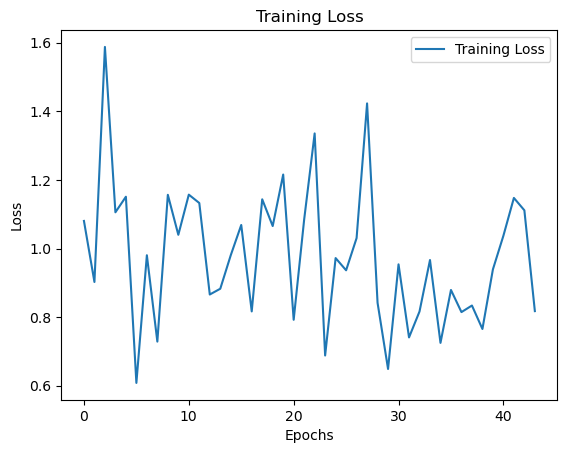

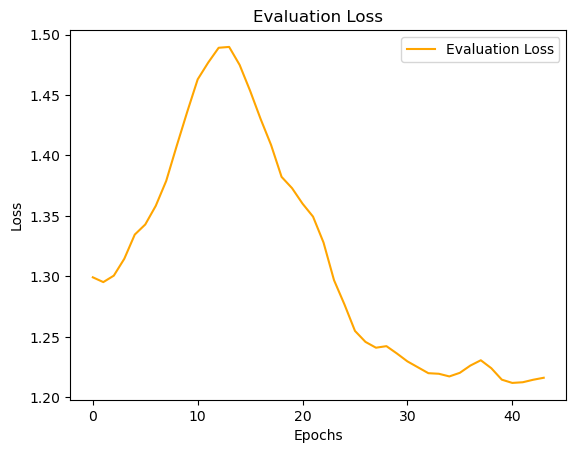

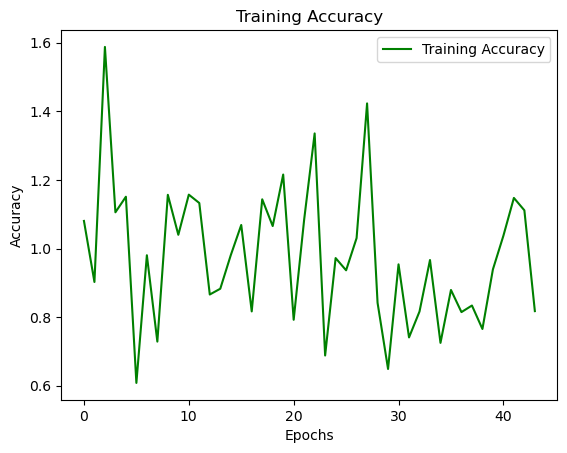

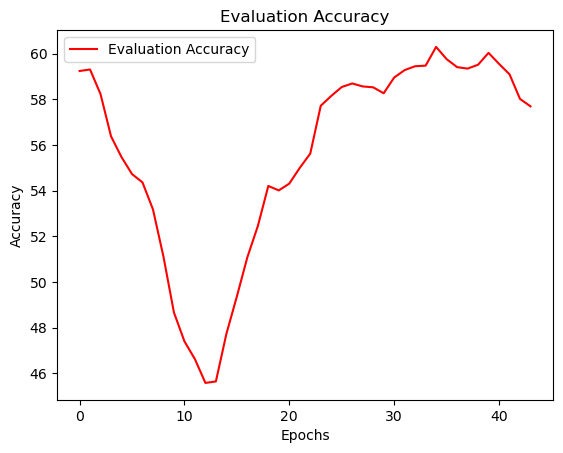

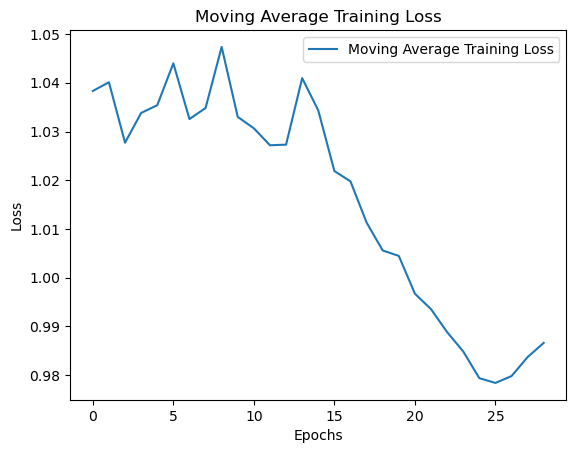

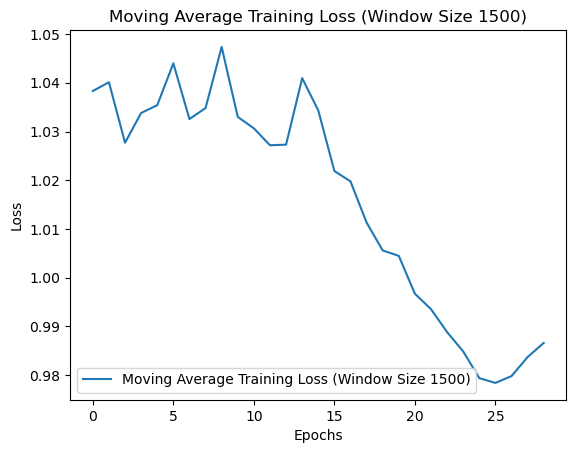

In [77]:
check_res(checkpoint_path)

In [79]:
max(checkpoint['eval_acc'])

60.29948